In [84]:
%pylab inline

from matplotlib import rc

fig_font = {'family':'sans-serif','sans-serif':['Helvetica'],
           'serif':['Helvetica'],'size':14}
rc('font',**fig_font)
rc('legend',fontsize=18, handletextpad=0.5)
rc('text', usetex=True)
rc('figure', figsize=(3.33,2.22))
#  rc('figure.subplot', left=0.10, top=0.90, bottom=0.12, right=0.95)
rc('axes', linewidth=0.5, color_cycle= ['#496ee2', '#8e053b', 'm', '#ef9708', 'g', 'c'])
rc('lines', linewidth=1)
import csv

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [85]:
def fig_to_file(fig, filename, ext):
    fig.savefig("graphs/%s.%s" % (filename, ext), format=ext, bbox_inches='tight')

def draw_simple_plot(xlabel,ylabel,title,xdata,ydata):
    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.plot(xdata,ydata,"kx") 
    
def draw_line_graph(xlabel,ylabel,title,xdata,ydata):
    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)
    axes.plot(xdata,ydata)
    return axes
    
def draw_lines_graph(xlabel,ylabel,title,xdata,ydata,lines):
    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_title(title)

    for line in lines:
        axes.plot(xdata[line],ydata[line]) 

    axes.legend(lines,loc=1,frameon=True)

def draw_cdf(xlabel,title,data):
    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.set_xlabel(xlabel)
    axes.set_ylabel('Cumlative Propability')
    axes.set_title(title)

    axes.set_xlim([np.percentile(data,0),np.percentile(data,97)])
    axes.set_ylim([0,100])
    
    sorted_data = data
    sorted_data.sort()
    size=len(sorted_data)
    cdf_y = []
    for y in range (1,size+1):
        cdf_y.append(y*100.0/size)

    axes.plot(sorted_data, cdf_y)

    
def draw_cdfs(xlabel,title,data,lines):
    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    axes.set_xlabel(xlabel)
    axes.set_ylabel('Cumlative Propability')
    axes.set_title(title)

    axes.set_xlim([0,5])
    axes.set_ylim([0,100])
    
    sorted_data = {}
    cdf_y = {}

    for line in lines:
        sorted_data[line] = data[line]
        sorted_data[line].sort()
        cdf_y[line]=[]
        size=len(sorted_data[line])
        for y in range (1,size+1):
            cdf_y[line].append(y*100.0/size)
            
        axes.plot(sorted_data[line], cdf_y[line])

    axes.legend(lines,loc=1,frameon=True)

def draw_histo(xlabel,title,data,bins):
    fig = plt.figure(figsize=[6,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_xlabel(xlabel)
    axes.set_ylabel('Probability')
    axes.set_title(title)

    n, bins, patches = axes.hist(data,bins,facecolor='green', normed=True, alpha=0.2)
    
def draw_boxplot(ylabel,title,data):
    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_ylabel(ylabel)
    axes.set_title(title)
    
    axes.boxplot(data,showfliers=False)
    
def draw_boxplots(xlabel,ylabel,title,data,lines):
    fig = plt.figure(figsize=[12,4])
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.set_ylabel(ylabel)
    axes.set_xlabel(xlabel)
    axes.set_title(title)
    
    axes.boxplot([ v for v in data.values() ],labels=lines,showfliers=False)
    
def read_results_file(filename):
    results = {'latency':[],'reqs':[],'time':[]}
    start_time = 0.0
    start_set = False
    with open(filename, newline='') as csvfile:
        for row in csv.reader(csvfile):
            # latency in ms
            val = int(row[2])/1000000 
            results['latency'].append(val)
            results['reqs'].append(row[1])

            secs = float(row[0].rsplit(" ")[1].rsplit(":")[2])
            mins = float(row[0].rsplit(" ")[1].rsplit(":")[1])*60.0 

            # we assume all experiments run within an hour
            if not(start_set):
                start_time = secs+mins # time in secs
                start_set = True

            results['time'].append(((secs+mins) - start_time)*1000)
    return results
def latency_to_throughput(data):
    total = np.sum(data)
    measurements = len(data)
    return (1000 * measurements / total)

In [86]:
date = '05-12-134629'

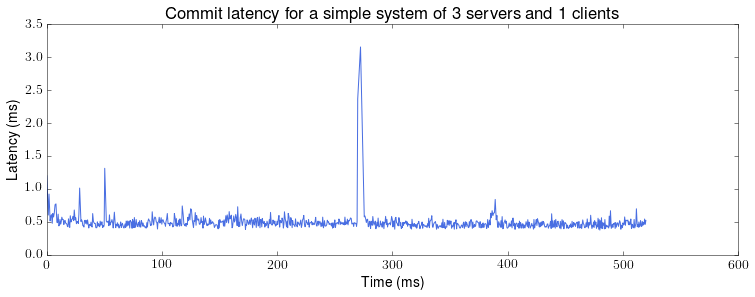

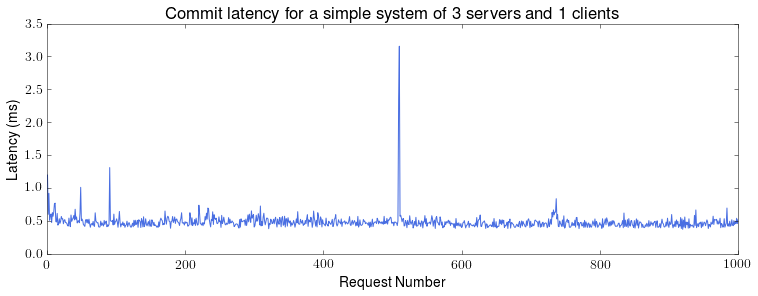

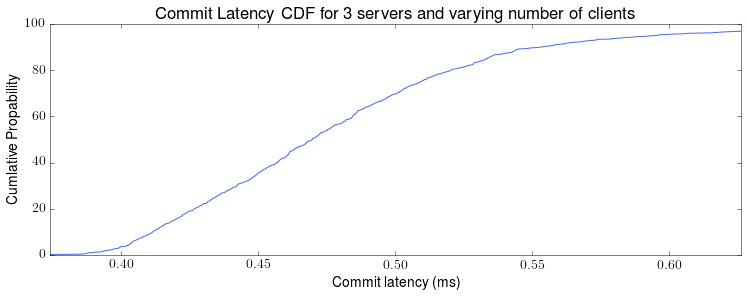

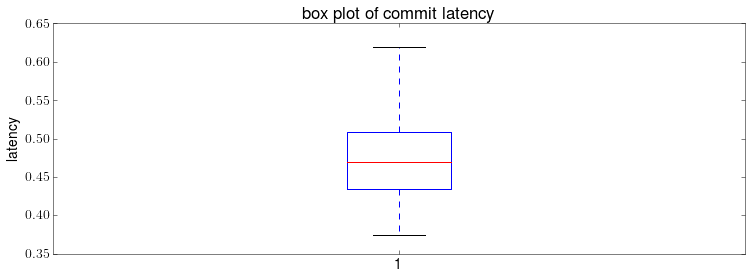

In [87]:
# SIMPLE: a simple 3 server and 1 client system

simple = read_results_file('results/'+date+'/simple/3s1c/latency_1.csv')

draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['time'],simple['latency'])

draw_line_graph('Request Number', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['reqs'],simple['latency'])
draw_cdf('Commit latency (ms)', 
         'Commit Latency CDF for 3 servers and varying number of clients',
         simple['latency'])

draw_boxplot("latency","box plot of commit latency",simple['latency'])

In [88]:
# LOAD TESTING DATA 


clients = range(1,15)
latency = {}
latency_by_client = {}
req_by_client = {}
time_by_client = {}

for c in clients:
    latency[c]=[]
    latency_by_client[c] = {}
    req_by_client[c] = {}
    time_by_client[c] = {}
    for client in range(1,c+1):
        res = read_results_file('results/'+date+'/load/3s'+str(c)+'c/latency_'+str(client)+'.csv')
        latency_by_client[c][client] = res['latency']
        latency[c] = latency[c] + (res['latency'])
        req_by_client[c][client] = res['reqs']
        time_by_client[c][client] = res['time']     

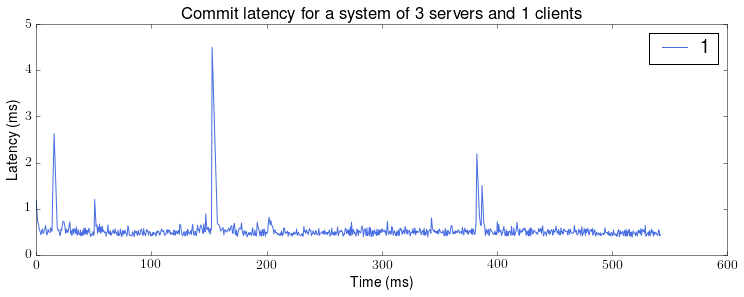

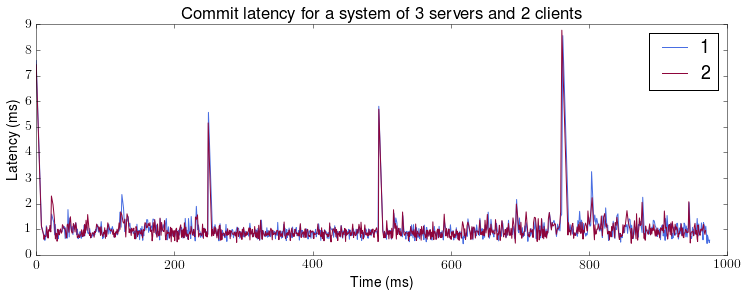

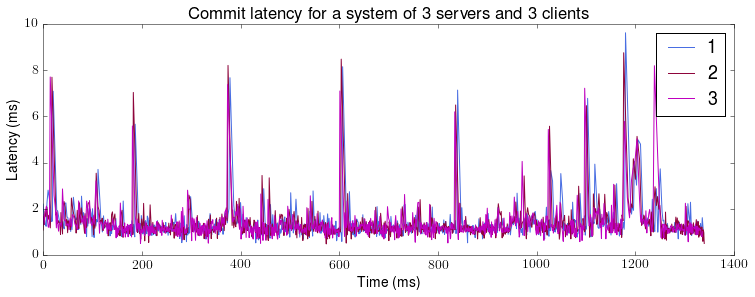

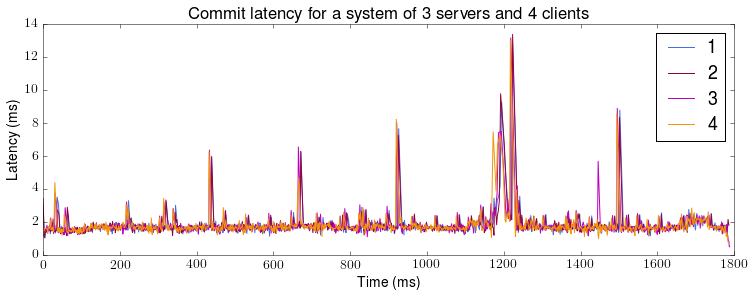

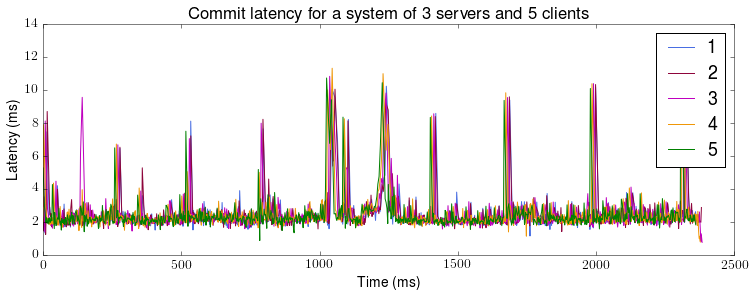

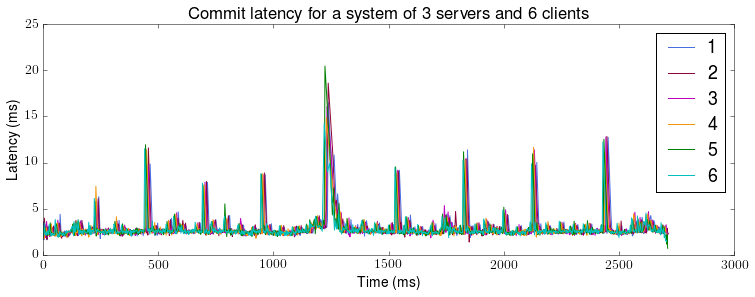

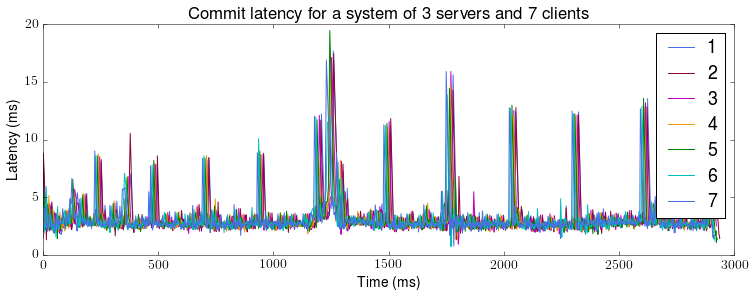

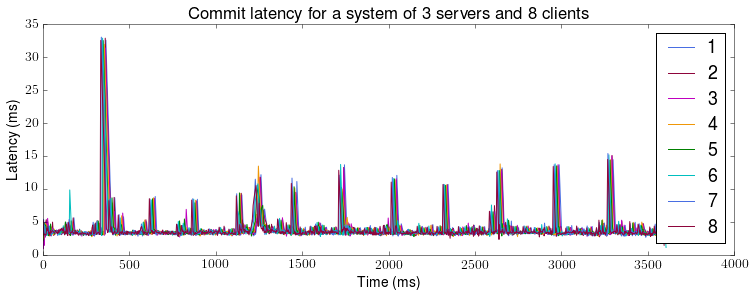

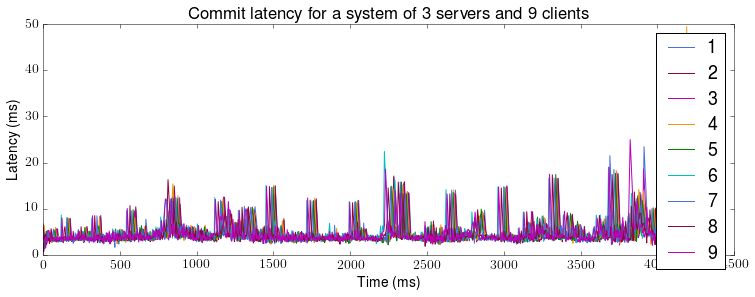

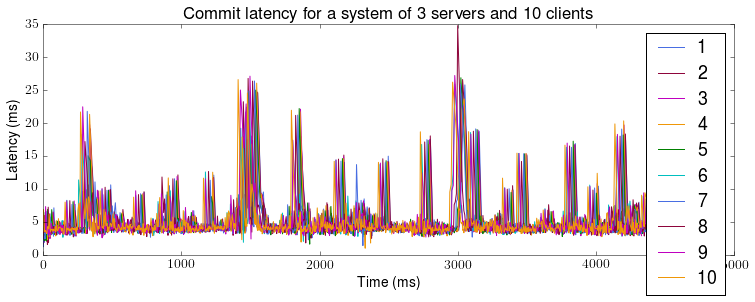

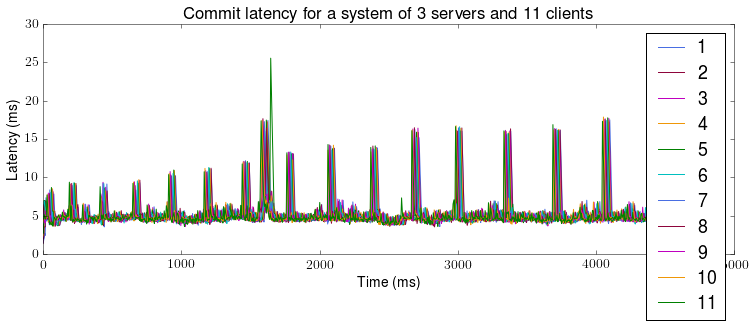

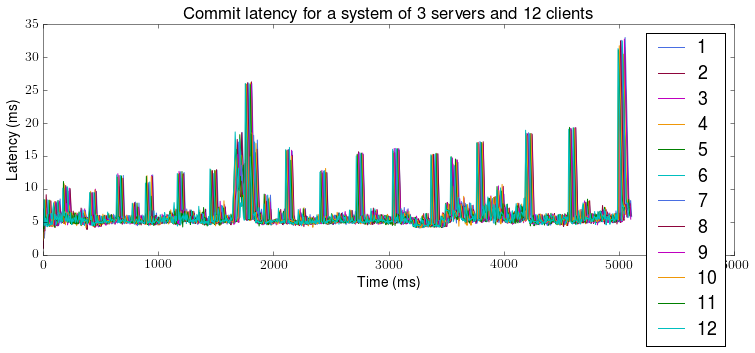

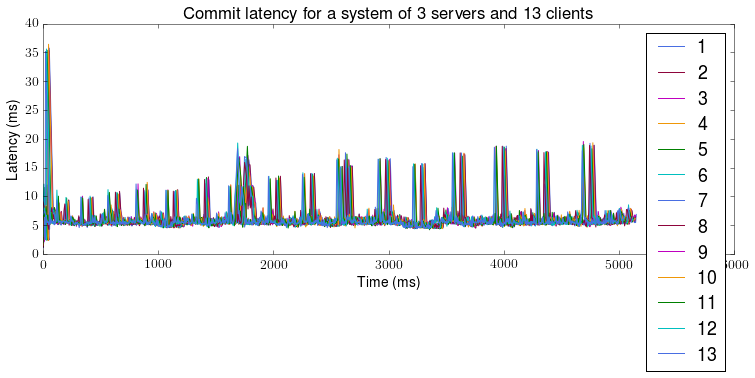

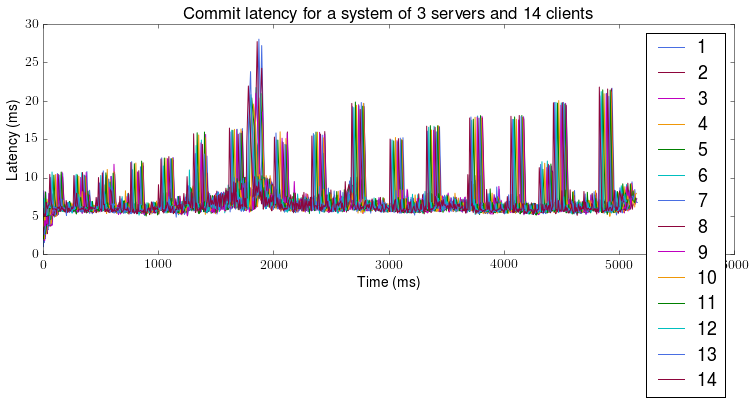

In [89]:
# plotting latency over actual time (for X client systems)

for c in clients:
    draw_lines_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a system of 3 servers and '+str(c)+' clients', 
                    time_by_client[c],latency_by_client[c],range(1,c+1))



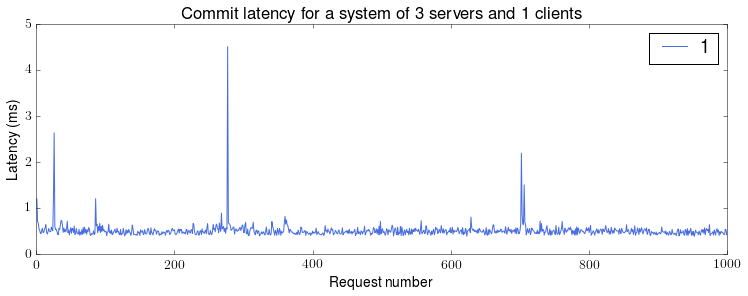

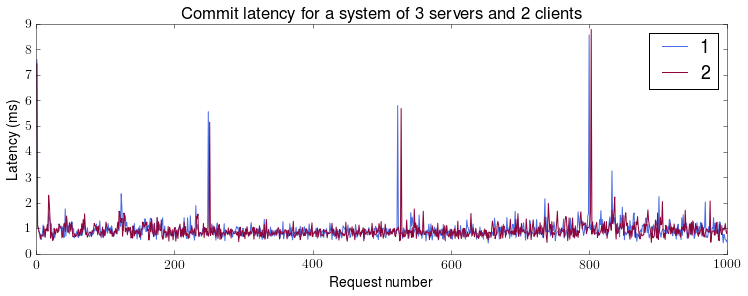

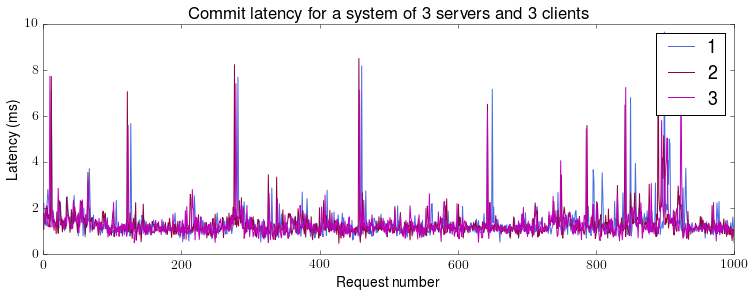

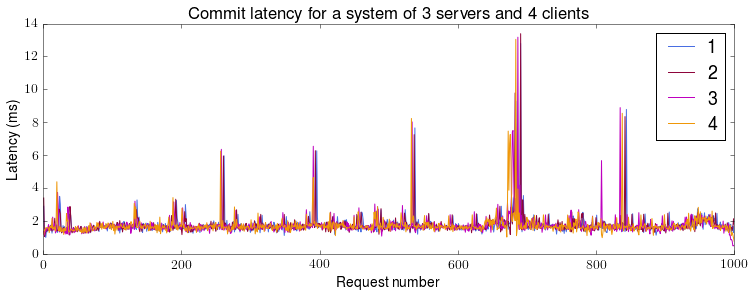

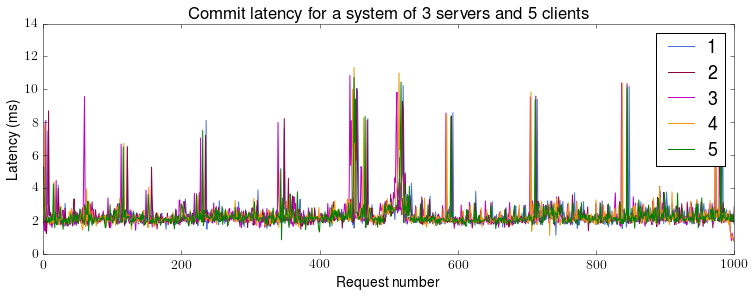

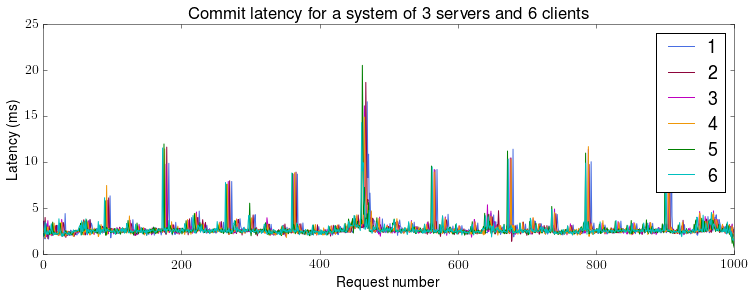

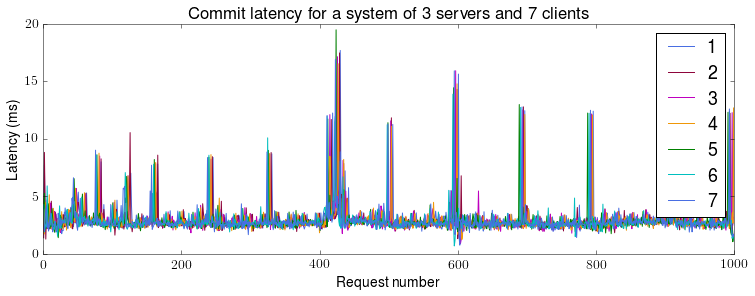

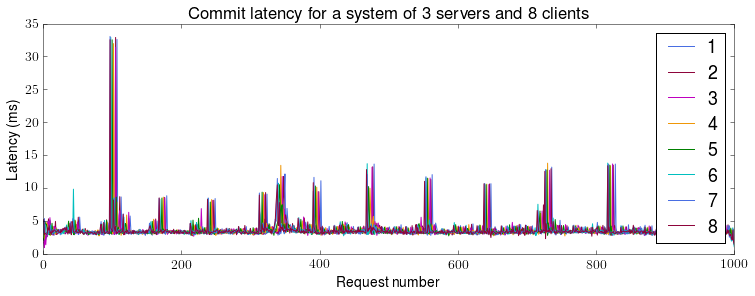

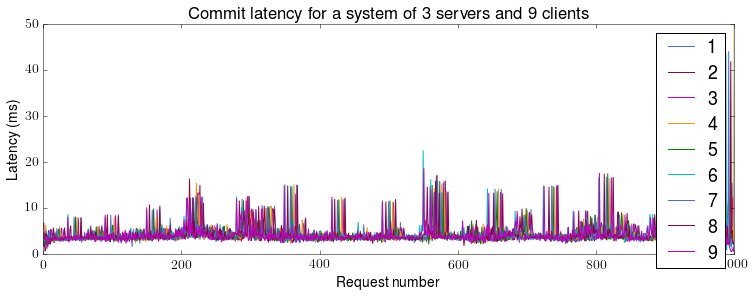

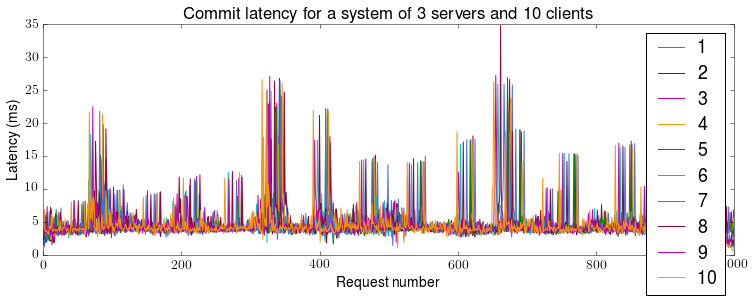

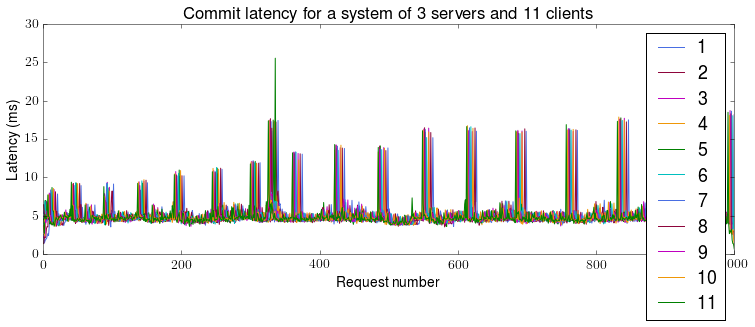

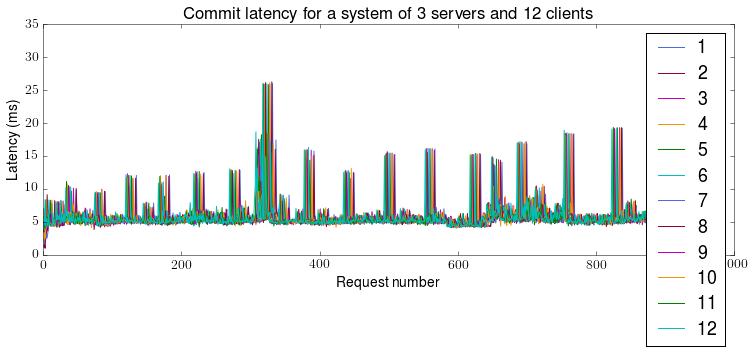

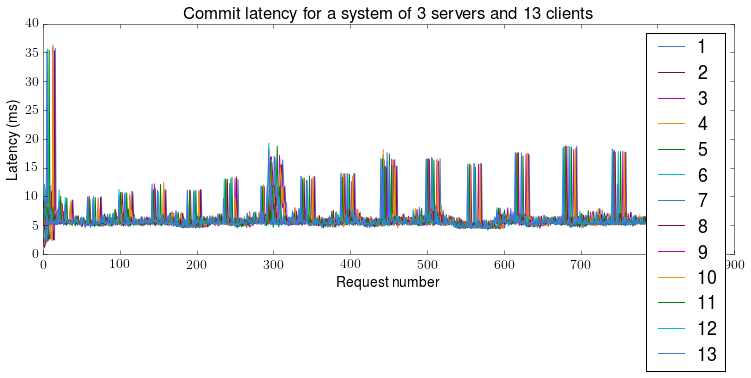

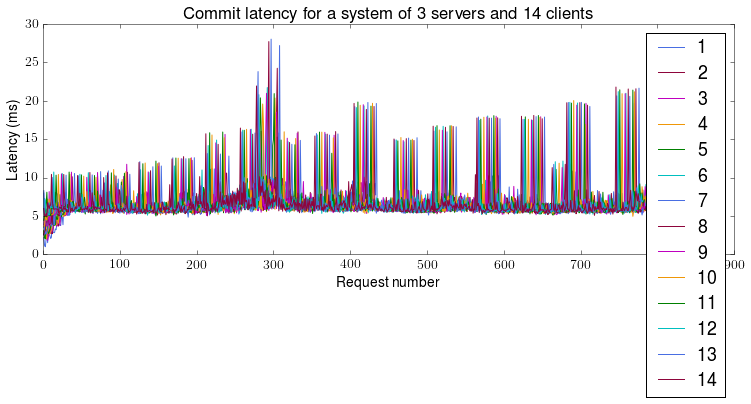

In [90]:
# plotting latency over request time (for X client system)

for c in clients:
    draw_lines_graph('Request number','Latency (ms)','Commit latency for a system of 3 servers and '+str(c)+' clients',
                    req_by_client[c], latency_by_client[c], range(1,c+1))


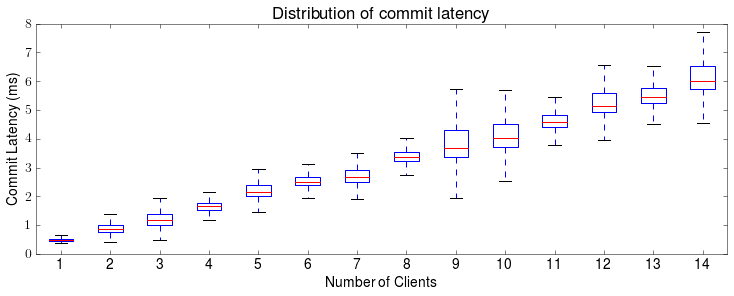

In [91]:
draw_boxplots("Number of Clients","Commit Latency (ms)","Distribution of commit latency",latency,clients)


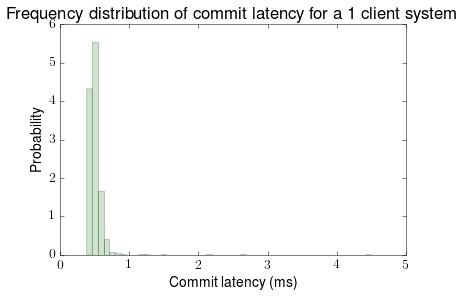

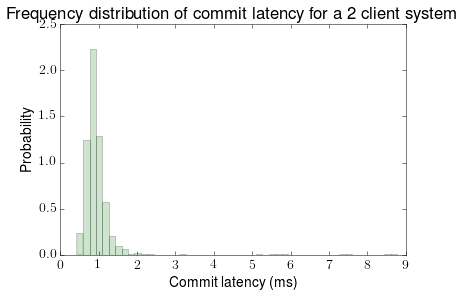

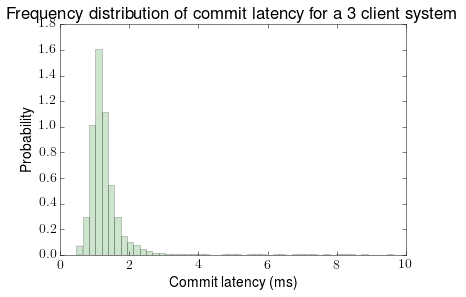

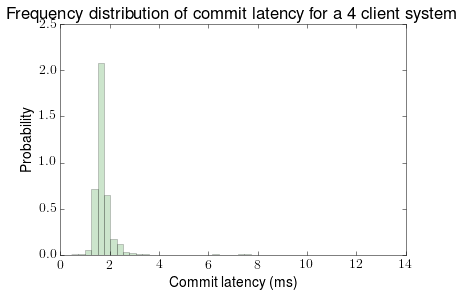

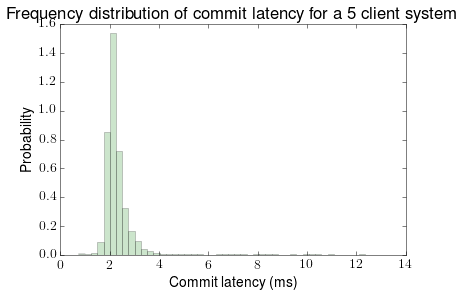

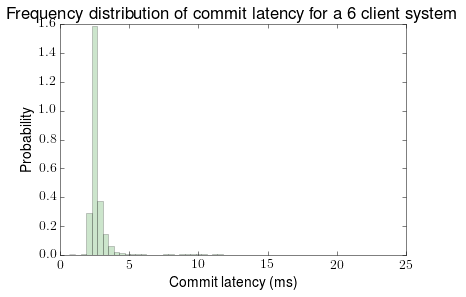

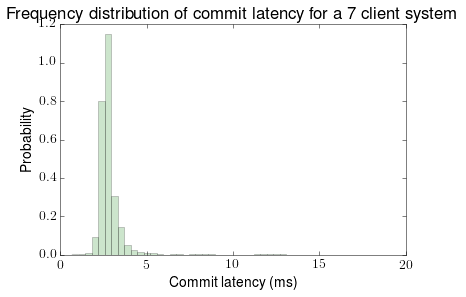

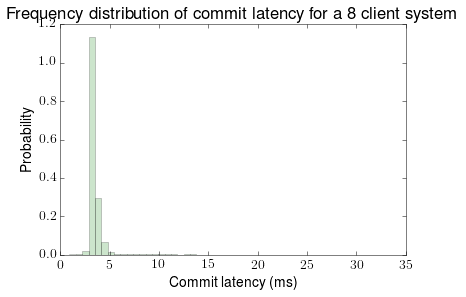

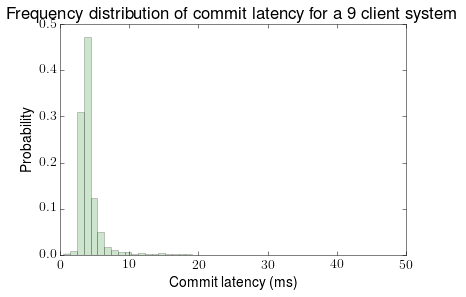

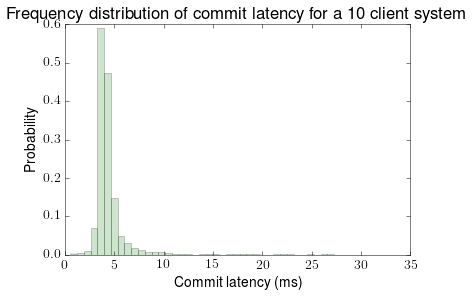

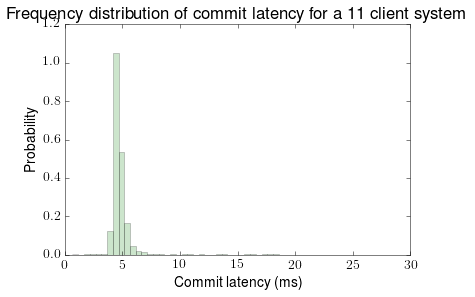

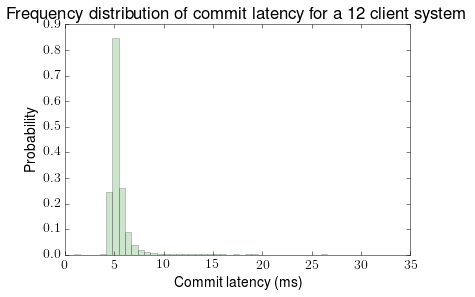

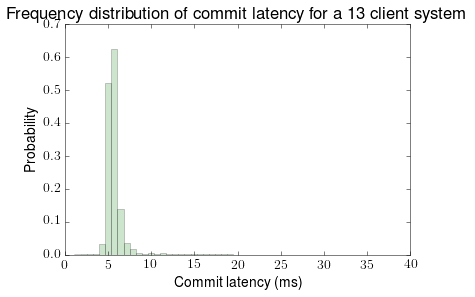

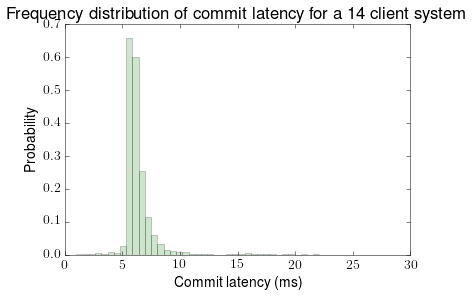

In [92]:
# plot latency distribution (for X client system)

for c in clients:
    draw_histo('Commit latency (ms)',
               'Frequency distribution of commit latency for a '+str(c)+' client system',
               latency[c],50)



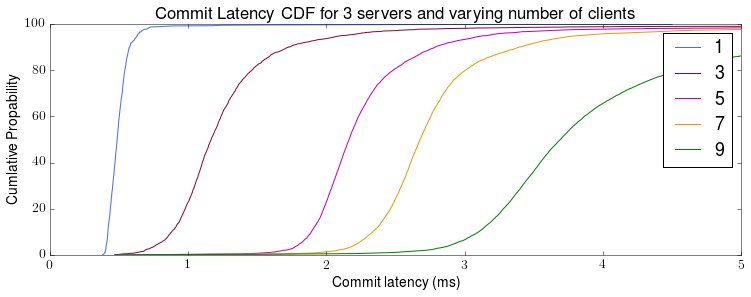

In [93]:
# plot simple CFD

draw_cdfs('Commit latency (ms)', 
         'Commit Latency CDF for 3 servers and varying number of clients',
         latency,[1,3,5,7,9])



range(1, 15)
[1976.1161620837827, 1069.2249936104583, 767.86005496183066, 570.94186771059594, 427.20832197915075, 373.58524014393066, 346.21136605641419, 280.32431149053184, 239.62700954957378, 222.85527853545904, 206.62137200256549, 179.90768980497154, 173.05134165819763, 155.7213588374016]
[0.48589100000000002, 0.87190100000000004, 1.1669905, 1.6507390000000002, 2.1645630000000002, 2.5099244999999999, 2.6781484999999998, 3.3564555, 3.6925005, 4.0224159999999998, 4.5948134999999999, 5.1499734999999998, 5.4614209999999996, 5.9924549999999996]


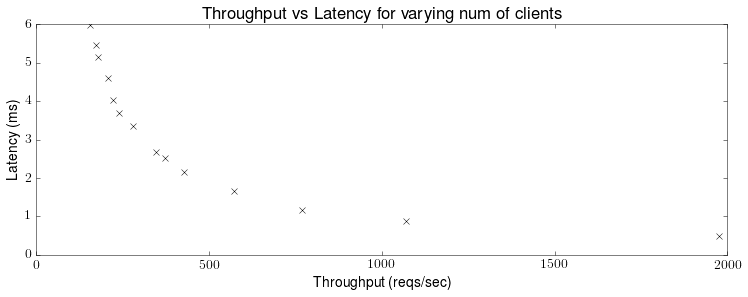

In [94]:
# plotting throughput vs latency

medium_latency=[]
throughput=[]

for c in clients:
    throughput.append(latency_to_throughput(latency[c]))
    medium_latency.append(np.percentile(latency[c],50))
    

draw_simple_plot('Throughput (reqs/sec)','Latency (ms)','Throughput vs Latency for varying num of clients',throughput,medium_latency)
print(clients)
print(throughput)
print(medium_latency)


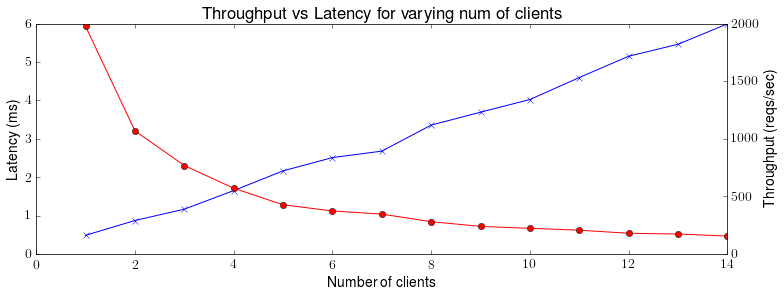

In [95]:
fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Number of clients')
axes.set_ylabel('Latency (ms)')
axes.set_title('Throughput vs Latency for varying num of clients')

axes.plot(clients, medium_latency,"bx-") 

axes2 = axes.twinx()
axes2.set_ylabel('Throughput (reqs/sec)')
axes2.plot(clients, throughput,"ro-") 

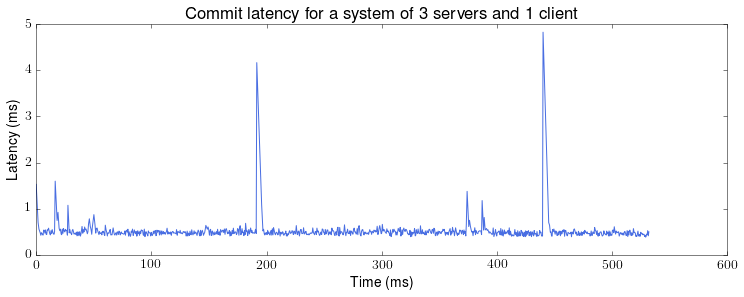

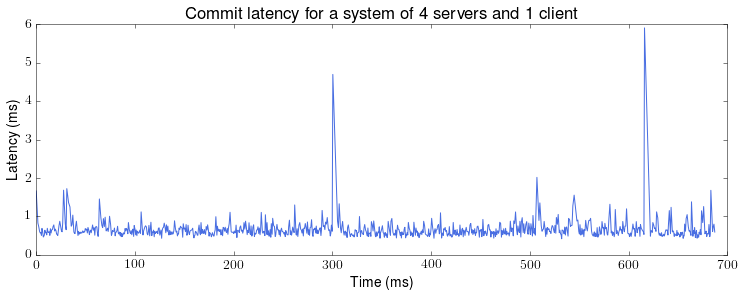

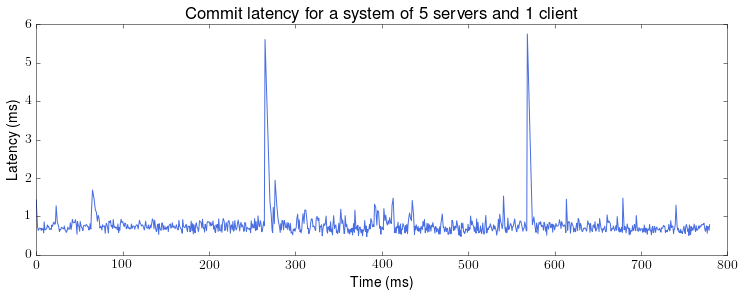

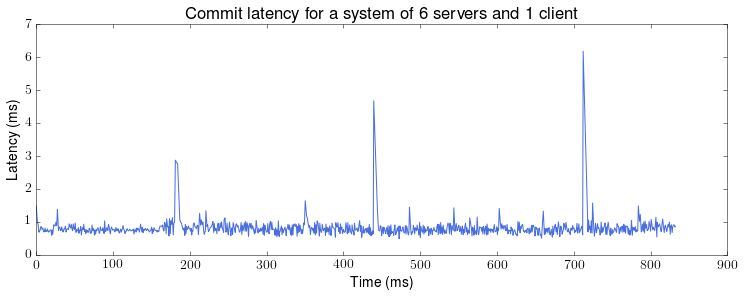

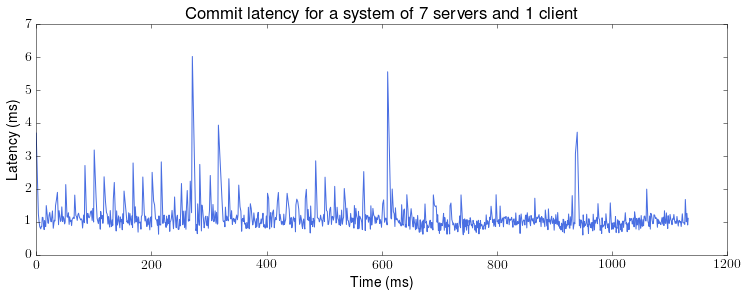

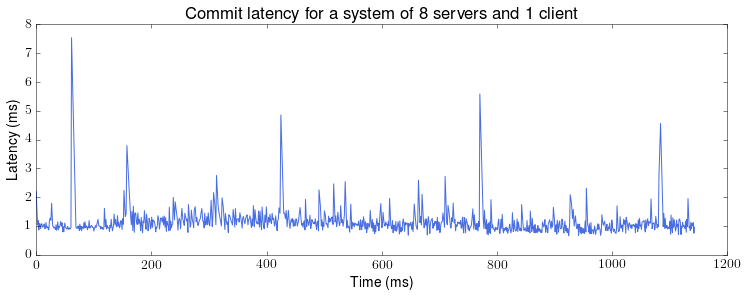

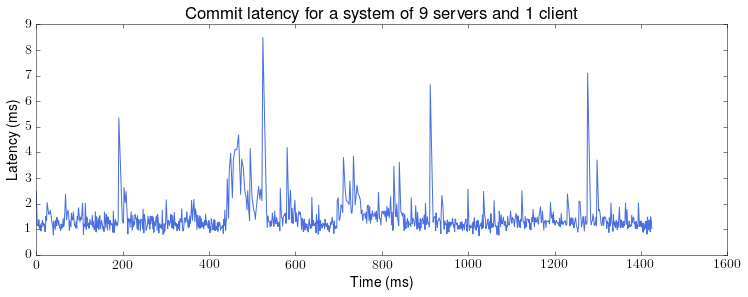

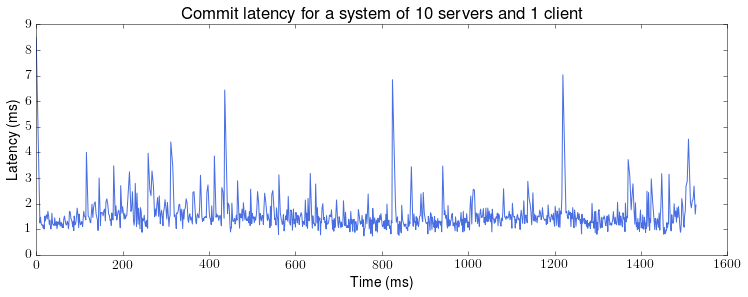

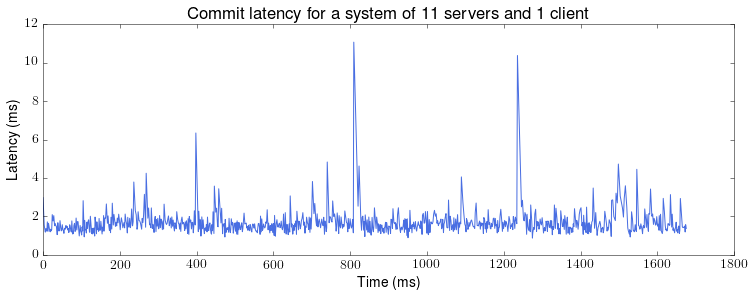

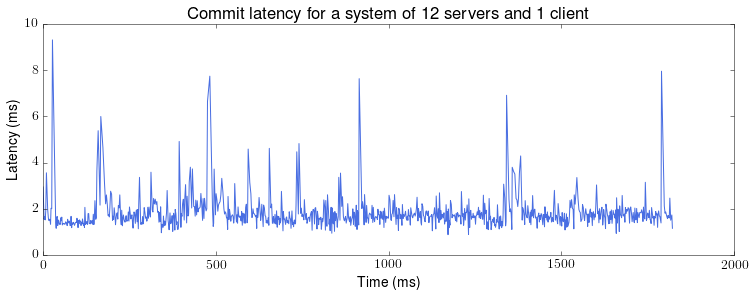

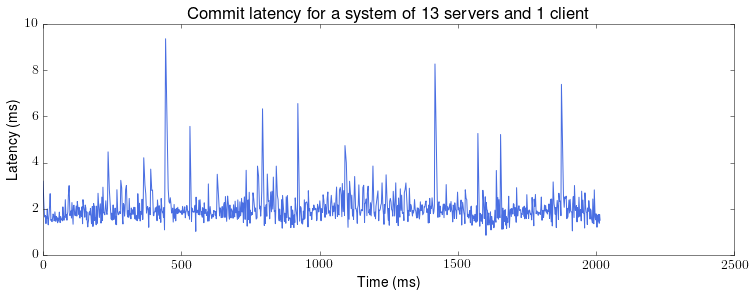

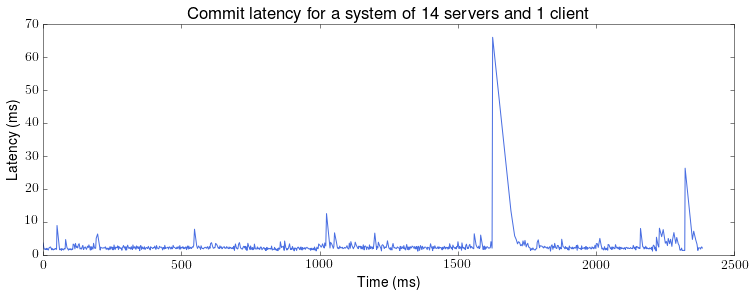

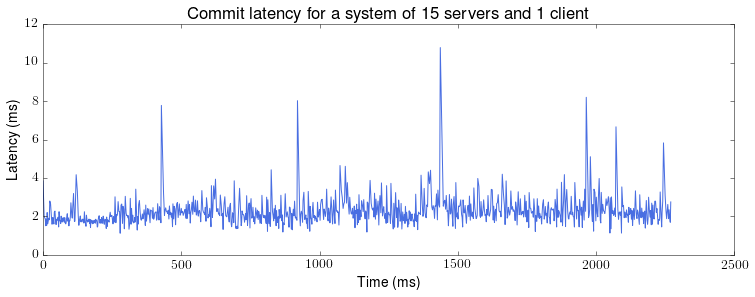

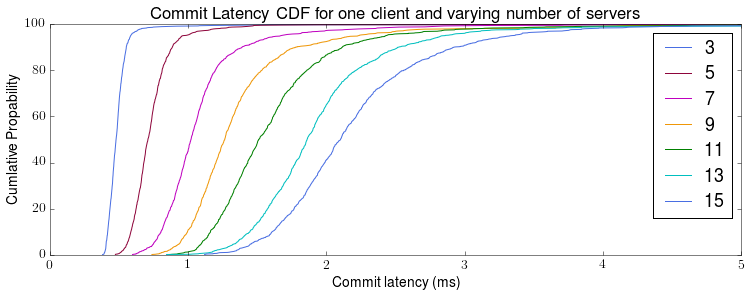

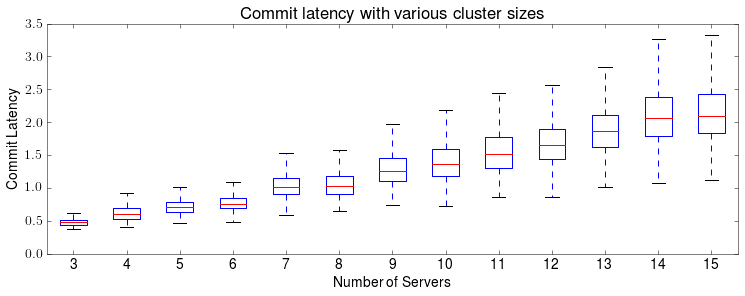

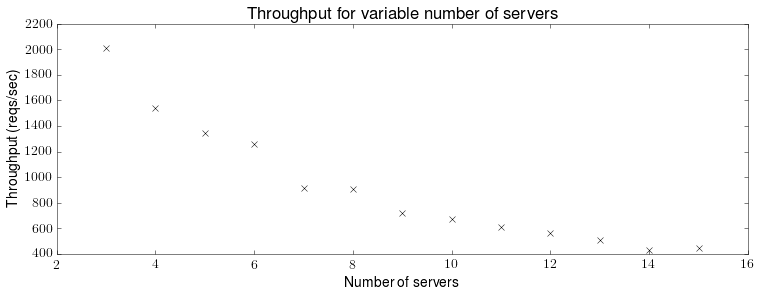

In [96]:
# SCALE: for other numbers of servers

serv_latency = {}
serv_throughput = []
servs = range(3,16)
servs_less = range(3,16,2)


for s in servs:
    scale = read_results_file('results/'+str(date)+'/scale/'+str(s)+'s1c/latency_1.csv')
    serv_latency[s]= scale["latency"]
    serv_throughput.append(latency_to_throughput(scale["latency"]))
    draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a system of '+str(s)+' servers and 1 client', 
                   scale['time'],scale['latency'])
    
draw_cdfs('Commit latency (ms)','Commit Latency CDF for one client and varying number of servers',serv_latency,servs_less)

draw_boxplots("Number of Servers","Commit Latency","Commit latency with various cluster sizes",serv_latency,servs)

draw_simple_plot("Number of servers","Throughput (reqs/sec)","Throughput for variable number of servers",servs,serv_throughput)


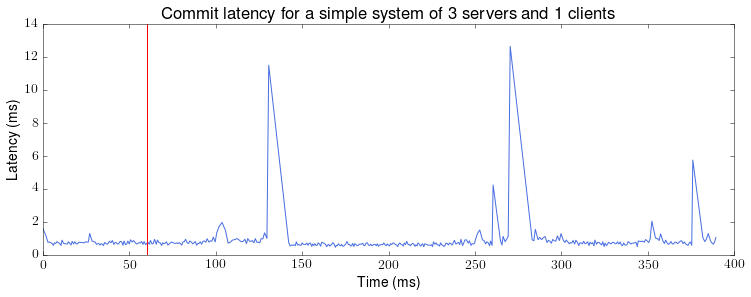

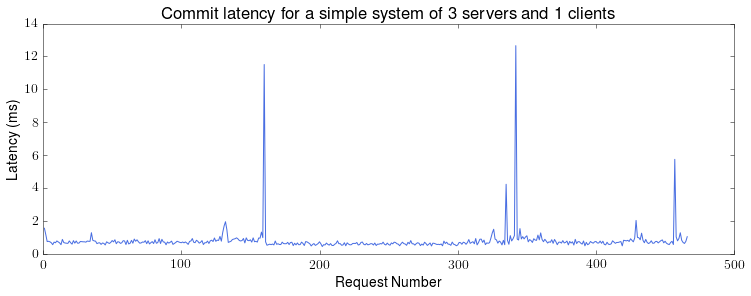

In [97]:
# FAILURE: testing master failure in a 5 node system

simple = read_results_file('results/'+date+'/failure/5s1c/latency_1.csv')

axes = draw_line_graph('Time (ms)', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['time'],simple['latency'])

axes.axvline(60,0,7,color='r')

draw_line_graph('Request Number', 'Latency (ms)', 'Commit latency for a simple system of 3 servers and 1 clients', 
                   simple['reqs'],simple['latency'])